<a href="https://colab.research.google.com/github/motazalratta/de-assessments/blob/main/Phase3/notebooks/Transactions_Datetime_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Authentication

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from google.colab import auth
from google.cloud.bigquery import magics

magics.context.project = 'analog-patrol-311615'

auth.authenticate_user()
print('Authenticated')

Authenticated


#Transactions Datetime Distribution

In [ ]:
#@title Transactions Day Distribution
%%bigquery  transactions_dist_Day
with 
distincttransactions AS (
  SELECT
    DISTINCT uniqueid,
    transactiondateutc 
  FROM
    `assessmentdb.transactions`)
select DATETIME_TRUNC(transactiondateutc,day) AS day, count(*) count
from  distincttransactions group by DATETIME_TRUNC(transactiondateutc,day) ;


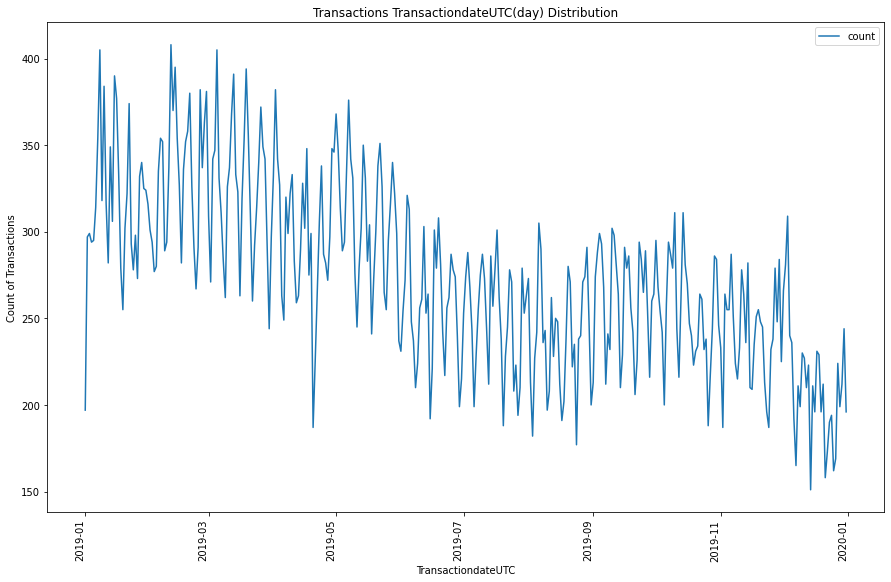

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
transactions_dist_Day.plot(x = 'day', y = 'count', rot = 40, ax = ax)
ax.set(xlabel="TransactiondateUTC",
       ylabel="Count of Transactions",
       title="Transactions TransactiondateUTC(day) Distribution")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

In [ ]:
#@title Transactions Week Distribution
%%bigquery  transactions_dist_week
with 
distincttransactions AS (
  SELECT
    DISTINCT uniqueid,
    transactiondateutc 
  FROM
    `assessmentdb.transactions`)
select DATETIME_TRUNC(transactiondateutc,week) AS week, count(*) count
from  distincttransactions group by DATETIME_TRUNC(transactiondateutc,week) ;


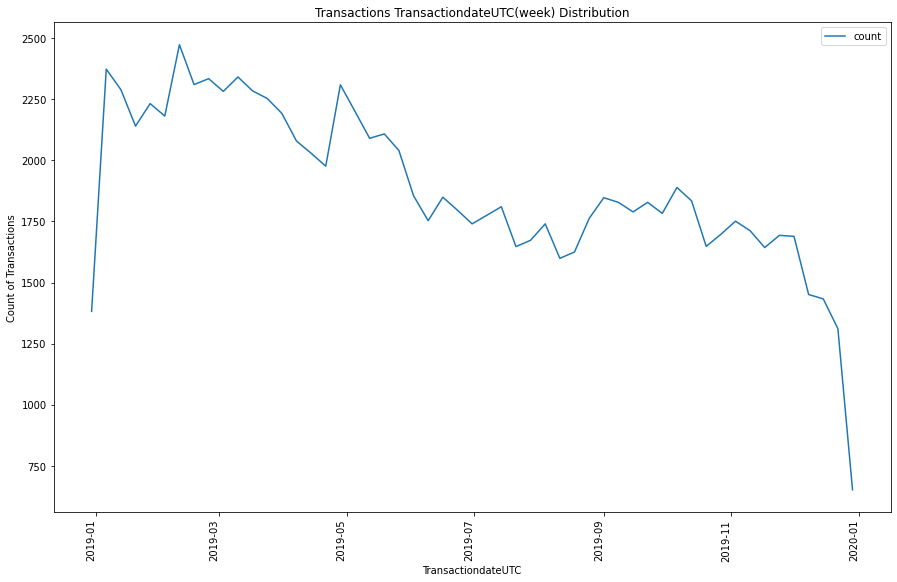

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
transactions_dist_week.plot(x = 'week', y = 'count', rot = 40, ax = ax)
ax.set(xlabel="TransactiondateUTC",
       ylabel="Count of Transactions",
       title="Transactions TransactiondateUTC(week) Distribution")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

In [ ]:
#@title Transactions Weekday Distribution
%%bigquery  transactions_dist_weekday
WITH
  distincttransactions AS (
  SELECT
    DISTINCT uniqueid,
    transactiondateutc
  FROM
    `assessmentdb.transactions`)
SELECT 
  CASE
    WHEN weekdayid= 1 THEN 'Sunday'
    WHEN weekdayid= 2 THEN 'Monday'
    WHEN weekdayid= 3 THEN 'Tuesday'
    WHEN weekdayid= 4 THEN 'Wednesday'
    WHEN weekdayid= 5 THEN 'Thursday'
    WHEN weekdayid= 6 THEN 'Friday'
    WHEN weekdayid= 7 THEN 'Saturday'
END
  weekday,
  count,
  weekdayid,
FROM (
  SELECT
    EXTRACT(DAYOFWEEK FROM transactiondateutc) AS weekdayid,
    COUNT(*) count
  FROM
    distincttransactions
  GROUP BY
    EXTRACT(DAYOFWEEK FROM transactiondateutc)
    )
ORDER BY weekdayid

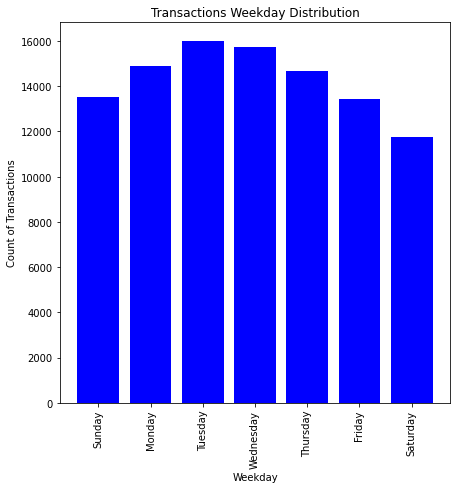

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
 
ax.bar(transactions_dist_weekday['weekday'],
        transactions_dist_weekday['count'],
        color='blue')
 
ax.set(xlabel="Weekday",
       ylabel="Count of Transactions",
       title="Transactions Weekday Distribution")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()